In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from tensorflow import keras

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows =10
pd.options.display.float_format = '{:.2f}'.format
bike_df = pd.read_csv('day.csv', sep = ',')
bike_df = bike_df.reindex(np.random.permutation(bike_df.index))


In [0]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
               ...   
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
Length: 16, dtype: object

In [0]:
def preprocess(bike_df):
  select_features = bike_df[['dteday',	'season', 'yr',	'mnth',	'holiday','weekday','workingday', 'weathersit',	'temp',	'atemp','hum','windspeed','casual','registered','cnt']]
  for i in range(15):
    if i == 1 or i == 3 or i ==5 or i == 7:
      select_features[list(select_features)[i]] = select_features[list(select_features)[i]].astype('category')
  cat_columns =select_features.select_dtypes(['category']).columns
  process_features = pd.get_dummies(select_features[cat_columns], drop_first=True)
  return process_features

def preprocess_target(bike_df):
  output_targets = bike_df[['cnt']]
  return output_targets

In [0]:
#Training Data
training_sample = preprocess(bike_df.head(511))
training_target = preprocess_target(bike_df.head(511))

#Validation Data
validation_sample = preprocess(bike_df.head(220))
validation_target = preprocess_target(bike_df.head(220))

print ("Training example summary:")
display.display(training_sample.describe())

print('Validation example summary: ')
display.display(validation_sample.describe())

print('Training target summary:')
display.display(training_target.describe())

print ('Validation Target summary:')
display.display(validation_target.describe())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Training example summary:


,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,...,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00,511.00
mean,0.25,0.28,0.23,0.07,0.09,0.07,0.09,0.08,0.09,0.09,...,0.07,0.08,0.16,0.14,0.14,0.14,0.13,0.15,0.33,0.03
std,0.43,0.45,0.42,0.26,0.29,0.26,0.28,0.28,0.29,0.28,...,0.26,0.27,0.36,0.35,0.34,0.35,0.34,0.36,0.47,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Validation example summary: 


,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,...,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.28,0.27,0.21,0.06,0.11,0.08,0.08,0.09,0.09,0.09,...,0.06,0.09,0.16,0.15,0.16,0.15,0.12,0.13,0.36,0.02
std,0.45,0.45,0.41,0.24,0.31,0.27,0.27,0.29,0.28,0.29,...,0.24,0.29,0.37,0.36,0.37,0.36,0.32,0.33,0.48,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Training target summary:


,cnt
count,511.00
mean,4613.15
std,1947.19
min,22.00
25%,3241.00
50%,4634.00
75%,6199.50
max,8714.00


Validation Target summary:


,cnt
count,220.00
mean,4451.53
std,1953.93
min,627.00
25%,2912.25
50%,4335.50
75%,5898.50
max,8362.00


In [0]:
# Now this is where Keras the mighty comes in

model = keras.Sequential([
    keras.layers.Dense(64, activation = tf.nn.relu,
                      input_shape = (training_sample.shape[1],)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(1)
])

rms_optimizer = tf.train.RMSPropOptimizer(0.001)

#The loss is the mean square error and the metric used is the mean absolute error
model.compile(loss='mse',
             optimizer = rms_optimizer,
             metrics = ['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


In [0]:
#To check whether our model runs
class Dot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0 : print('')
    print ('.', end='')
    
set_epoch = 1500
tf.set_random_seed(1)

# Store training stats
fitting = model.fit(training_sample, training_target, epochs = set_epoch,
                   validation_split =0.2, verbose = 0,
                   callbacks=[Dot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
print(fitting.history)

{'val_loss': [28401343.572815534, 28386637.106796116, 28365758.87378641, 28337075.398058254, 28298927.708737865, 28249400.252427183, 28188425.145631067, 28112564.09708738, 28021147.766990293, 27914189.68932039, 27789696.40776699, 27648495.339805827, 27485789.106796116, 27305066.932038836, 27103757.553398058, 26885934.87378641, 26642411.980582524, 26374887.398058254, 26086260.446601942, 25773358.13592233, 25439503.844660193, 25081640.54368932, 24699863.572815534, 24295890.660194173, 23860970.27184466, 23411180.640776698, 22930084.31067961, 22436180.203883495, 21915492.970873788, 21369970.485436894, 20795304.650485437, 20208921.155339807, 19592408.990291264, 18964326.91262136, 18319724.96116505, 17657895.524271846, 16972910.291262135, 16282750.398058252, 15575392.611650486, 14866791.95145631, 14152186.077669904, 13433071.213592233, 12705354.417475728, 11990819.18932039, 11277780.101941748, 10578645.004854368, 9878090.834951457, 9204896.854368933, 8550216.194174757, 7893455.689320388], 'v

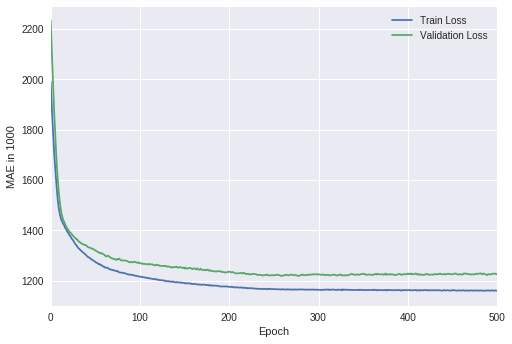

In [0]:
#Plotting the model

import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE in 1000')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Validation Loss')
  plt.legend()
  plt.xlim([0,500])
plot_history(fitting)